<a href="https://colab.research.google.com/github/yollafrdl/DTS-Machine-Learning/blob/main/train_classifier_InceptionResnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os
import imgaug.augmenters as iaa
import cv2
import natsort

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load image from folder

In [7]:
path_dataset = '/content/drive/MyDrive/GCA - Safepediasircon15/dataset_blur'
folders = natsort.natsorted(os.listdir(path_dataset))
print(folders)
print(len(folders))

['Almandine_merah', 'Anatase', 'Barite', 'Calcopyrite', 'Cass_air_ladik', 'Cass_bangka_barat', 'Cass_bening', 'Cass_cupat_luar', 'Cass_laut_air_kantung', 'Cass_laut_belo', 'Cass_laut_ketapang', 'Cass_laut_modong', 'Cass_laut_penganak', 'Cass_laut_tempilang', 'Cass_primer_tb_pemali', 'Cass_ranggam', 'Cassiterite_laut_belingo', 'Galena', 'Garmet', 'Hematite', 'Ilmenite', 'Ilmenite_coklat', 'Ilmenite_py_kundur', 'Lempung_pasir', 'Leucoxene', 'Limonite', 'Magnetite', 'Marcasite_tempilang', 'Metal', 'Monazite', 'Muscovite', 'Oksida_besi', 'Oksida_besi bulat', 'PB_Buatan', 'Psilomelane', 'Psilomelane_primer', 'Quarsa', 'Quarsa_kotor', 'Quarsa_kuning', 'Rutile', 'Siderite', 'Siderite_laut matras', 'Siderite_laut_cupat_dalam', 'Siderite_permis', 'Slag', 'Tourmaline', 'Tourmaline_jeruji', 'Tourmaline_permis', 'Wolframite', 'Zircon']
50


In [8]:
dataset_collection = []
target = []
classes = []

cls_count = 0
# print('ID\tSample\t\tName')
for folder in folders:
    dir = os.path.join(path_dataset, folder)
    filename = os.listdir(dir)
    count_img = 0

    if len(filename) > 0:
        for f in filename:
            img_path =  os.path.join(dir, f)  
            dataset_collection.append(img_path)
            target.append(cls_count)
            count_img += 1 

#     print('{}\t{} sample\t{}'.format(cls_count, count_img, folder))
        classes.append(folder)
        cls_count += 1

# dataset_collection = np.array(dataset_collection)
print('\nTotal:\t{} sample'.format(len(dataset_collection)))


Total:	11039 sample


In [9]:
size_img = (75, 75, 3)

all_data = []
labels = []
count = 0
for img_path, label in zip(dataset_collection, target):
    print(count)
    orig_img = cv2.imread(img_path)
    seq_aug = [
        None,
        iaa.Fliplr(1),
        iaa.Flipud(1),
        iaa.Affine()
    ]

    for aug in seq_aug:
        img = orig_img.copy()
        if aug != None:
            img = aug(image=img)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img = resize(img, size_img)
        all_data.append(img)
        labels.append(label)
    count += 1

print('All Training:', len(all_data))

Streaming output truncated to the last 5000 lines.
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229

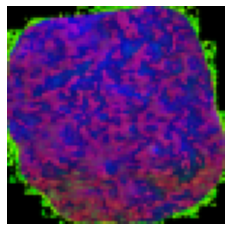

In [ ]:
plt.axis("off")
plt.imshow(all_data[8])

In [ ]:
label = to_categorical(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset_collection, target, test_size=0.2, random_state=42, stratify=target)
# x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

## Save Numpy

In [ ]:
label = to_categorical(labels)
label, data = np.array(label), np.array(all_data)

In [10]:
np.save("/content/drive/MyDrive/GCA - Safepediasircon15/numpy/Rotate 4x 50 class/all_data_75.npy", all_data)
np.save("/content/drive/MyDrive/GCA - Safepediasircon15/numpy/Rotate 4x 50 class/labels_75.npy", labels)

In [ ]:
from collections import Counter

In [ ]:
x = set(y_train)
y = set(labels)

In [ ]:
for a in x:
  if a not in y:
    print(a)

In [ ]:
len(y)

49

## load numpy data

In [ ]:
all_data = np.load("/content/drive/MyDrive/GCA - Safepediasircon15/Datasets/Classifier/numpy/Rotate 4x 49 class/all_data_75.npy")
labels = np.load("/content/drive/MyDrive/GCA - Safepediasircon15/Datasets/Classifier/numpy/Rotate 4x 49 class/labels_75.npy")

In [ ]:
label = to_categorical(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(all_data, label, test_size=0.2, random_state=42, stratify=label)
x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [ ]:
x_train = np.load("/content/drive/MyDrive/GCA - Safepediasircon15/Datasets/Classifier/numpy/Train Test Data/xtrain_no_flatten_75.npy")
y_train = np.load("/content/drive/MyDrive/GCA - Safepediasircon15/Datasets/Classifier/numpy/Train Test Data/ytrain_no_flatten_75.npy")
x_test = np.load("/content/drive/MyDrive/GCA - Safepediasircon15/Datasets/Classifier/numpy/Train Test Data/xtest_no_flatten_75.npy")
y_test = np.load("/content/drive/MyDrive/GCA - Safepediasircon15/Datasets/Classifier/numpy/Train Test Data/ytest_no_flatten_75.npy")

## Inception ResNet V2 Model

In [ ]:
num_label = len(y_train[0])
print(f'Jumlah class = {len(y_train[0])}')

Jumlah class = 49


In [ ]:
model2 = InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(75, 75, 3),
    pooling='avg',
    classes=num_label,
    classifier_activation="softmax"
)

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
# flat = Flatten()(model2.layers[-1].output)
do = Dropout(0.5)(model2.layers[-1].output)
fc = Dense(1024, activation='relu')(do)
fc2 = Dense(512, activation='relu')(fc)
fc3 = Dense(256, activation='relu')(fc2)
output = Dense(num_label, activation='softmax')(fc3)

In [ ]:
batch_size = 256
steps_per_epoch = len(y_train) / batch_size
save_period = 10

In [ ]:
model_checkpoint_epoch = ModelCheckpoint(filepath='/content/drive/MyDrive/GCA - Safepediasircon15/Detectron2/models/InceptionResNet{epoch:02d}.h5',
                                   monitor='loss',
                                   save_freq = int(save_period * steps_per_epoch))
model_checkpoint_best = ModelCheckpoint(filepath='/content/drive/MyDrive/GCA - Safepediasircon15/Detectron2/models/InceptionResNet-best{epoch:02d}.h5',
                                   monitor='loss',
                                   save_best_only=True)

In [ ]:
model2 = Model(inputs=model2.inputs, outputs=output)
model2.compile(optimizer= Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_model = model2.fit(x_train, y_train, epochs = 50, verbose = 1, batch_size = batch_size)

Epoch 1/50
135/135 [==============================] - 65s 277ms/step - loss: 0.0810 - accuracy: 0.3625
Epoch 2/50
135/135 [==============================] - 38s 278ms/step - loss: 0.0301 - accuracy: 0.7207
Epoch 3/50
135/135 [==============================] - 38s 281ms/step - loss: 0.0126 - accuracy: 0.8990
Epoch 4/50
135/135 [==============================] - 37s 276ms/step - loss: 0.0064 - accuracy: 0.9534
Epoch 5/50
135/135 [==============================] - 37s 276ms/step - loss: 0.0042 - accuracy: 0.9698
Epoch 6/50
135/135 [==============================] - 37s 276ms/step - loss: 0.0037 - accuracy: 0.9742
Epoch 7/50
135/135 [==============================] - 37s 278ms/step - loss: 0.0030 - accuracy: 0.9791
Epoch 8/50
135/135 [==============================] - 38s 279ms/step - loss: 0.0027 - accuracy: 0.9809
Epoch 9/50
135/135 [==============================] - 37s 277ms/step - loss: 0.0021 - accuracy: 0.9855
Epoch 10/50
135/135 [==============================] - 37s 276ms/step - l

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
out_pred = np.argmax(y_pred, axis = 1)

In [ ]:
out_label = np.argmax(y_test, axis = 1)

In [ ]:
cr = classification_report(out_label, out_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       204
           1       0.83      0.85      0.84       216
           2       0.00      0.00      0.00         4
           3       0.42      0.37      0.39       356
           4       0.72      0.56      0.63       108
           5       0.45      0.15      0.23       124
           6       0.93      0.86      0.90        96
           7       0.00      0.00      0.00         4
           8       0.72      0.82      0.77        84
           9       0.61      0.65      0.63       392
          10       0.66      0.46      0.54       384
          11       0.82      0.64      0.72       368
          12       0.74      0.59      0.66       252
          13       0.26      0.19      0.22        80
          14       0.86      0.99      0.92       164
          15       0.21      0.11      0.15       152
          16       0.78      0.63      0.70       304
          17       0.40    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model2.save('/content/drive/MyDrive/GCA - Safepediasircon15/Detectron2/models/InceptionResNet.h5')